# To find slope of Force Residual plot

In [4]:
import numpy as np
# Reading file
f=open('FrcMnt.out')
lines=f.readlines()[4:]


In [5]:
#Initiating lists
x=[]
y=[]

array=np.loadtxt(lines,dtype='str',delimiter=',')

# Reading timestep and total force
for i in lines:
    lines1=" ".join(i.split())
    lines2=lines1.split(' ')
    x.append(lines2[1])
    y.append(lines2[11])

In [6]:
'Length of array {}'.format(len(x))

'Length of array 9963'

In [7]:
# Converting from string to float

x=[float(i) for i in x]
y=[float(i) for i in y]

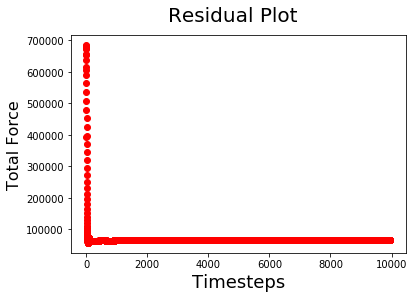

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x,y, 'ro')
fig.suptitle('Residual Plot', fontsize=20)
plt.xlabel('Timesteps', fontsize=18)
plt.ylabel('Total Force', fontsize=16)
plt.show()

# Averaging after timestep, n

In [9]:
n=6000

In [10]:
x1=x[n:]
y1=y[n:]

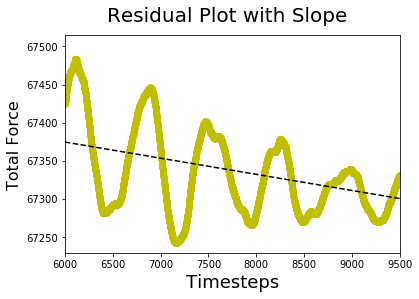

In [11]:
# Using least squres function for curve fitting
fit = np.polyfit(x1,y1,1)
fit_fn = np.poly1d(fit) 

# fit_fn is now a function which takes in x and returns an estimate for y


fig = plt.figure()
plt.plot(x1,y1, 'yo', x, fit_fn(x), '--k')
plt.xlim(n, 9500)
fig.suptitle('Residual Plot with Slope Line', fontsize=20)
plt.xlabel('Timesteps', fontsize=18)
plt.ylabel('Total Force', fontsize=16)
plt.show()


In [12]:
def slope(a,b):
    return (fit_fn(x)[a]-fit_fn(x)[b])/(x[a]-x[b])

# Slope of the fitted line

In [13]:
print(round(slope(0,1),5))

-0.02118


Since this is unstedy flow case, the residual plot of Total force will be oscillating around an average value. <br>
But this entire oscillation will be settling down with the timesteps. <br>
Since the slope of line is small value ~0, we can say flow has stabilized. <br>
Though the slope is small value, the line orientation looks steep as the y axis values has very high magnitude